# Exploratory Data Analysis (EDA): Diagnosing Product Sales Trends

## Product Sales Performance Analysis: Who's Winning the Market?

## How do product sales vary across different days of the week, and what insights can be drawn from the distribution of order volumes by product and day?

### 1. Overview

This diagnostic analysis aims to uncover meaningful patterns in product sales performance across different days of the week. By leveraging pivot tables and visual heatmaps, we explore how daily fluctuations in order volumes reflect customer purchasing behavior. The insights derived from this analysis are intended to inform strategic decisions in product stocking, marketing campaigns, and operational efficiency, ultimately driving sales growth and customer satisfaction.

### 2. Goal

- Understand how product sales volumes vary across the days of the week.
- Identify peak and low-performance days for each product.
- Reveal sales concentration trends to support demand forecasting.
- Provide visual insights for easier interpretation and decision-making.
- Equip sales and inventory teams with data-backed recommendations for optimizing schedules and stock levels.

### 3.  Business Challenge

- Uneven Sales Distribution: Inconsistent sales across the week could lead to overstocking or understocking.
- Lack of Day-Specific Product Strategy: Without knowing which products sell best on which days, marketing efforts may miss key opportunities.
- Operational Inefficiency: Misaligned staffing or logistics planning due to unpredictable order volumes.
- Missed Revenue Opportunities: Failure to capitalize on high-demand days with tailored promotions or upselling.

### 4. Analysis Approach

- Data Preparation: Clean and structure sales data with clear date and product columns.
- Pivot Table Creation: Generate a cross-tab view to summarize unit purchases by product and day of week.
- Visual Analysis: Build a heatmap to highlight volume intensity and uncover patterns at a glance.
- Insight Extraction: Interpret high and low sales zones to understand demand cycles.
- Strategic Recommendations: Advise stakeholders on product scheduling, inventory management, and promotional timing based on insights.

## Importing libraries

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

## Loading the clean dataframe (post-ETL process)

In [11]:
df = pd.read_csv("C:\\Monthly_Sales\\cleaned_data.csv")

In [12]:
df.head()

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address,Month,Month Name,Year,Day of Week,Hour,City,Total Sales
0,160155,Alienware Monitor,1,400.99,2024-01-01 05:04:00,"765 Ridge St, Portland, OR 97035",1,January,2024,Mon,5,Portland (OR),400.99
1,151041,AAA Batteries (4-pack),1,4.99,2024-01-01 05:04:00,"964 Lakeview St, Atlanta, GA 30301",1,January,2024,Mon,5,Atlanta (GA),4.99
2,146765,AAA Batteries (4-pack),1,4.99,2024-01-01 05:20:00,"546 10th St, San Francisco, CA 94016",1,January,2024,Mon,5,San Francisco (CA),4.99
3,145617,Amana Washing Machine,1,600.00,2024-01-01 05:24:00,"961 Meadow St, Portland, OR 97035",1,January,2024,Mon,5,Portland (OR),600.00
4,156535,Lightning Charging Cable,2,14.95,2024-01-01 05:45:00,"451 Elm St, Los Angeles, CA 90001",1,January,2024,Mon,5,Los Angeles (CA),29.90


## Pivot Table 

In [14]:
pivot_table = df.pivot_table(index = 'Product Name', columns = 'Day of Week' , values = 'Units Purchased', 
                             aggfunc = 'sum', observed=False )
pivot_table

Day of Week,Fri,Mon,Sat,Sun,Thu,Tue,Wed
Product Name,,,,,,,
AA Batteries (4-pack),3266,3332,3376,3179,3208,3297,3199
AAA Batteries (4-pack),3349,3522,3450,3462,3365,3488,3357
Alienware Monitor,581,560,570,564,509,556,521
Amana Dryer,94,106,89,87,85,88,73
Amana Washing Machine,88,99,92,90,77,75,90
Apple Airpods Headphones,2053,2166,2007,2099,1989,2084,2066
Bose SoundSport Headphones,1730,1922,1770,1793,1697,1795,1692
Dell Laptop,537,564,560,546,517,541,534
Dell UltraSharp Monitor,827,807,814,898,806,860,808


## Plotting Product Sales Distribution by Day of the Week

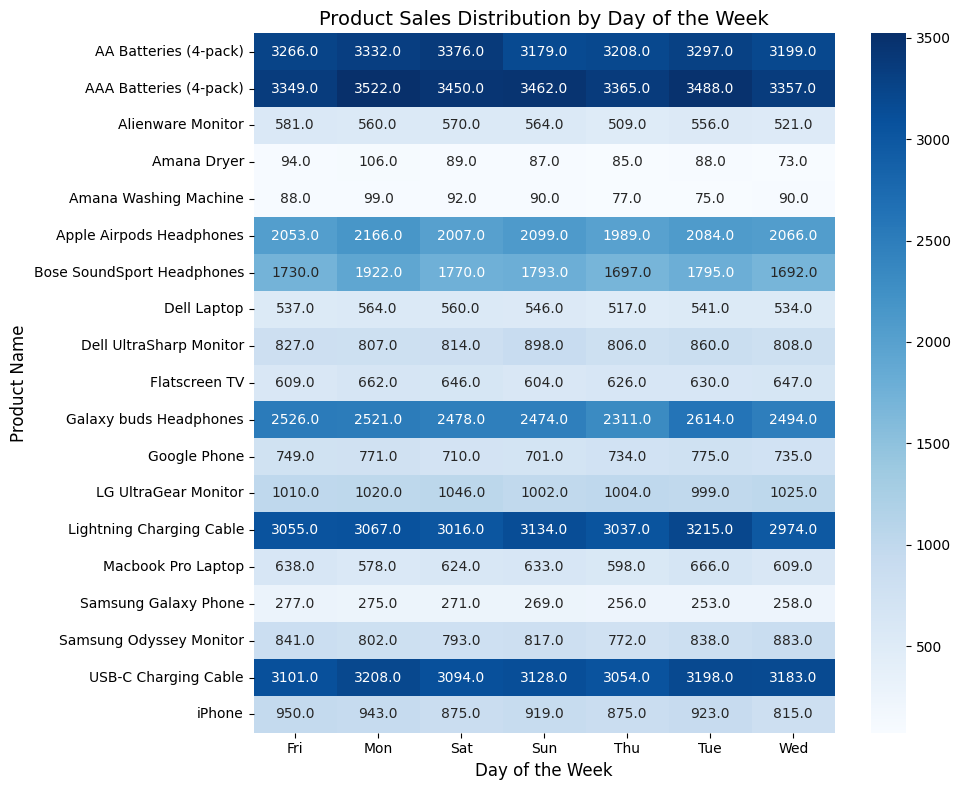

In [16]:
import matplotlib.ticker as ticker
import seaborn as sns

plt.figure(figsize=(10, 8)) 
sns.heatmap(pivot_table, annot = True, cmap = 'Blues', fmt='.1f', annot_kws={'size': 10})

plt.title('Product Sales Distribution by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Product Name', fontsize=12)

plt.tight_layout()

plt.savefig(r"C:/Users/DELL/OneDrive - COVENANT UNIVERSITY/Desktop/1. Retail Sales Analysis and Insights/5. Product Sales Performance Analysis.png", dpi=300, bbox_inches='tight')

plt.show()

## Key Insights

1. High-Demand Essentials Stay Consistent All Week: AAA & AA Batteries, Lightning/USB-C Charging Cables, and Galaxy Buds maintain consistently high sales across all days — essential, everyday items with minimal day-of-week fluctuation.

2. Headphones Show Slight Weekend Preference: Apple Airpods, Galaxy Buds, and Bose Headphones see mild sales bumps on weekends (Sat–Sun) — likely driven by leisure time, gifting, or casual shopping.

3. Monitors & Laptops Lean Toward Early Week Activity: Alienware, LG UltraGear, and Samsung Odyssey Monitors show slightly better performance on Mondays and Tuesdays, possibly reflecting corporate or productivity-driven purchases.

4. Smartphones Steady but Subtle Decline Midweek: Products like iPhone, Google Phone, and Samsung Galaxy display more stable demand, though there's a minor dip midweek (especially for iPhones on Wed: 815, the lowest).

5. Large Appliances Are Low Volume Overall: Amana Dryers & Washing Machines have low sales throughout the week, with slightly better traction on Mondays, which might suggest weekend browsing and Monday decision-making.

6. Weekend Electronics Spike: Flatscreen TVs and Dell UltraSharp Monitors peak subtly on Sunday (TV: 604 → 898 for monitor), pointing to consumer behavior around weekend entertainment or research-buying patterns.

## Strategic Recommendations 

1. Optimize Inventory Based on Product Consistency

- Maintain steady stock levels for essentials like charging cables and batteries throughout the week.
- Automate inventory reorder alerts for these top movers.


2. Launch Targeted Promotions by Day/Product

- Push headphone and gadget promotions on weekends to align with consumer browsing behavior.
- Offer Monday discounts on laptops/monitors to catch productivity-driven buyers.


3. Re-evaluate Shelf and Online Placement for Low Performers
- Low-volume appliances may benefit from bundling strategies or financing offers promoted early in the week.


4. Align Ad Spend and Email Campaigns with Peak Days

- Promote tech accessories midweek and larger electronics toward the weekend.
- Use weekend email marketing to spotlight headphones, entertainment tech, and leisure-related items.